# Project: Ford GoBike System Data
## (January 2018 - December 2018)

### by Salami Redeemer Okekale 


## Investigation Overview


>The aim of the investigation is to identify and visualize the features that influence the patronization of the Ford Go-Bike Service. 


## Dataset Overview

> The Ford GoBike System is a bike rental program in the US. Within a service area, you can pick up and drop off a bicycle, based on your current needs. This project analyzes and visualizes the data collected from users of the GoBike program. The data can be found at https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv.

The dataset includes:

> an ID number for each bicycle
> how long it was rented for, in seconds
> the beginning and end staton ID, latitude, longitude and station name
> the start and end time
> the year the user was born
> the gender of the user
> whether the user has a subscription to the service or not​There are 2252058 rows and 15 columns.

<a id='wrangling'></a>
## Data Wrangling
> In this step we will import all relevant python libraries needed to analysis and explore our data to know what operation we need to do to make our data clean and tidy.

In [24]:
# importing libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb 
from datetime import datetime, timedelta
%matplotlib inline 


# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")


#read data_set and make copy to save it 
df_r = pd.read_csv("dataset/201902-fordgobike-tripdata.csv")
df = df_r.copy()

In [25]:
# Are there duplicates, let's find out.
df.duplicated().sum()

0

In [26]:
# Are there NaN values, let's find out.
df.isnull().sum() 

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

<a id='clean'></a>
## Cleaning Step
There are some quality issues that need to be cleaned :
1. missing values(start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender)
2. Start/end times are not in the timestamp format
3. The _id columns are not in object format: eg. start_station_id, end_station_ & bike_id. 
4. Member birth is in the float format, but needs to be converted to integer format.

In [27]:
#1. Editing all null values out of the dataset.
df.dropna(inplace=True)

In [28]:
#2. Changing the Start/end times format to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [29]:
#3. Changing the _id-columns: bike_id, start_station_id, and end_station_id to object
df['start_station_id'] = df['start_station_id'].astype(str)
df['end_station_id'] = df['end_station_id'].astype(str)
df['bike_id'] = df['bike_id'].astype(str)

In [30]:
#3. Changing the  user_type, member_gender, and bike_share_for_all_trip to category format
df.user_type = df.user_type.astype('category')
df.bike_share_for_all_trip = df.bike_share_for_all_trip.astype('category')
df.member_gender = df.member_gender.astype('category')

In [31]:
#4. Converting the birth years of the members to their respective ages.
df['Age'] = 2021 - df['member_birth_year']
df['Age'] = df['Age'].astype(int)

# converting the ages to integer
df.member_birth_year = df.member_birth_year.astype(int)

# what is the average of ages ? 
df.Age.mean()

36.196865425945404

In [32]:
# It's safe to slowly do away with person's above the 66 years mark
df = df.query('Age <= 66')

In [33]:
# Let's separate the start_time and end_time into their individual components for visualization purposes
#  Start time month (January - December)
df['start_time_month'] = df['start_time'].dt.strftime('%B')

# Start time month (1-12)
df['start_time_month_num'] = df['start_time'].dt.month.astype(int)

# Start time weekday
df['start_time_weekday'] = df['start_time'].dt.strftime('%A')

# Start and end time hour
df['start_time_hour'] = df['start_time'].dt.hour
df['end_time_hour'] = df['end_time'].dt.hour

# Duration in seconds to duration in minutes
df['duration_min'] = df['duration_sec']/60
df['duration_min'] = df['duration_min'].astype(int)

# Let's view our data so far.
#df.head()

### Structure of the dataset.

> From the previous cell, there are 174952 rows for Ford GoBike System in a bike-sharing system. There are 23 features that describe the data set.         

### The main feature(s) of interest in the dataset.

> There many features that be explored. However, from the preliminary investigations, the main features are centered around the start and end of a ride. Since this can be used to calculate when bikes are in high or low demand. There is also enough data on the demography of the users as well as their relationship with the service - casual or paying customer.


### Key features of Interest:

> The start and end times, and related time-based information and user type.

<a id='univariate'></a>
## Univariate Exploration

> In this section,  Let's look at the distributions of each of our key features. 

In [34]:
# Setting color 
color = sb.color_palette()[2]

### What is the relative distribution of patronage per week-day? 

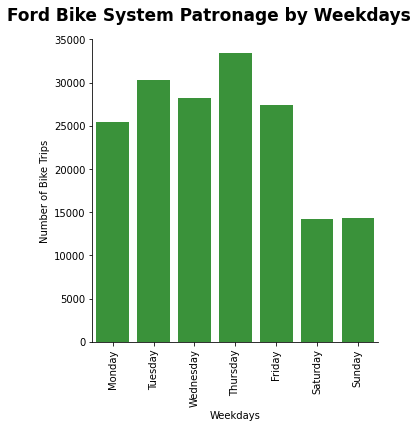

In [35]:
# Weekday usage of the Ford bike system
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plot = sb.catplot(data=df, x='start_time_weekday', kind='count', color = color, order = weekday)

plot.set_axis_labels('Weekdays', 'Number of Bike Trips')

plot.fig.suptitle('Ford Bike System Patronage by Weekdays', y=1.05, fontsize=17, fontweight='bold');

plot.set_xticklabels(rotation=90);

>Observation(1): Tuesdays and Thursdays are the most popular days for using the bike sharing system, however Mondays, Wednesdays and Fridays also see relatively high patronages, saturdays and sundays are not popular as the rest of days.

### What is the distripution of patronage by hour ? 

In [36]:
#Function to label the visualization
def label_title( xlabel, ylabel, title):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

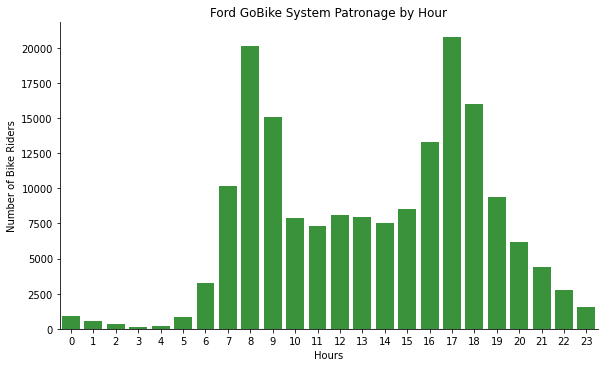

In [37]:
# Hourly usage of the Ford Go Bike System
plot = sb.catplot(data = df, x='start_time_hour', kind='count', color = color, aspect = 1.7)
label_title("Hours", "Number of Bike Riders", "Ford GoBike System Patronage by Hour")

> Observation(2): The most patronage is often during the hours of 8 and 9 in the morning, and in the afternoon at the hours of 5-6pm.

### What is the distribution of Ages of the customers? 

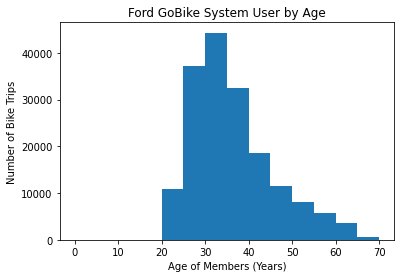

In [38]:
# Age group data
bin_edges = np.arange(0, 75, 5)
plt.hist(data = df, x = 'Age', bins = bin_edges);
label_title("Age of Members (Years)", "Number of Bike Trips", "Ford GoBike System User by Age")

Observation(3): The mean age of a user is 35.5 years old.

### What is the distribution of customers by Gender ? 

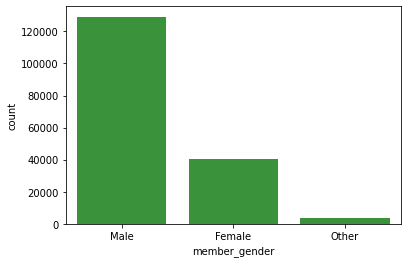

In [39]:
# Gender data 
o = df.member_gender.value_counts().index
sb.countplot(data=df , x='member_gender' , color=color , order=o);

>Observation(4): Most of the users of this system are male.

### What is the ditribution of user type (casual / paying) ? 

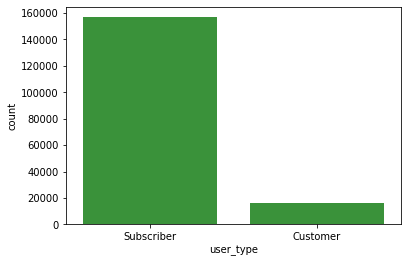

In [40]:
# Types of users 
o = df.user_type.value_counts().index
sb.countplot(data=df , x='user_type' , color=color , order=o);

> Observation(5): Most of the users of this system are Subscribers by user type.

### Which is the most popular Start stations ? 

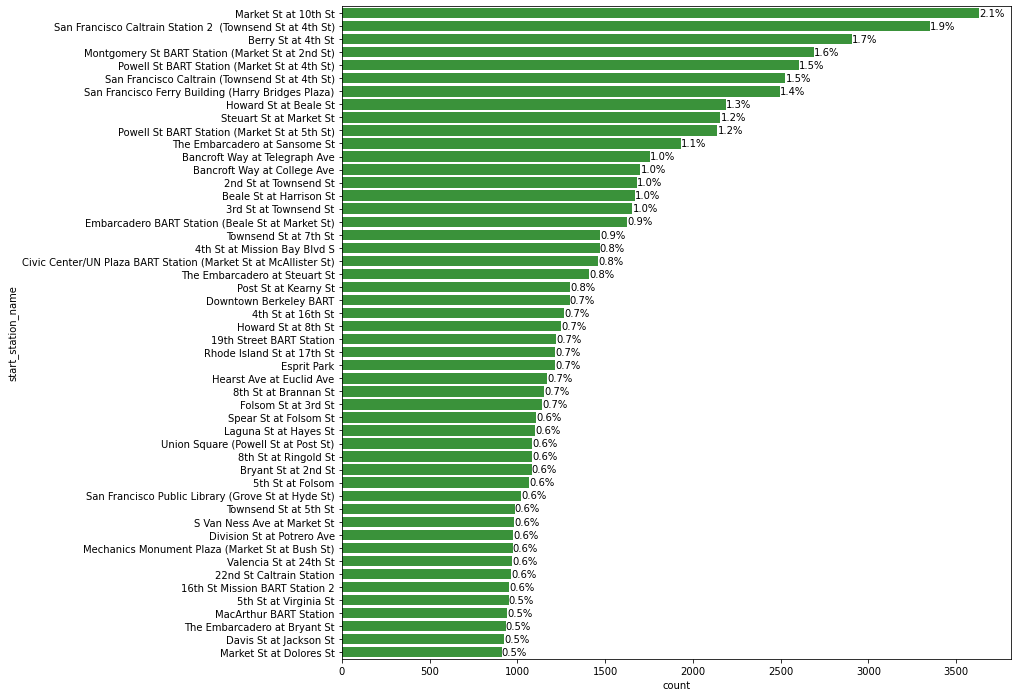

In [41]:
# Most popular Start station 
fig_dims = (12, 12)
fig, ax = plt.subplots(figsize=fig_dims)
c = sb.color_palette()[2]
o = df.start_station_name.value_counts().head(50).index
sb.countplot(data=df , y='start_station_name' , color=c , order=o);

# Adding percentage  
start_counts = df.start_station_name.value_counts().head(50)
for i in range(start_counts.shape[0]):
  count = start_counts[i]
  pct_string = '{:0.1f}%'.format(100*count/df.shape[0])
  plt.text(count+1, i, pct_string, va = 'center');

> Observation(6): The most popular station is Market St at 10th St, followed by San francisco caltrian station 2, with Market St at Dolores St. being the least.

<a id='bivariate'></a>
## Bivariate Exploration

> In this section, The relationships between pairs of variables will be investigated. 

### What is the relation between week-day and number of trips depending on user type  ? 

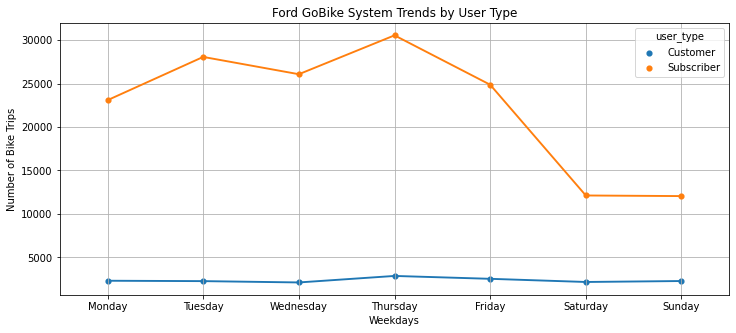

In [42]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
plt.figure(figsize=(12, 5))

df_user_week = df.groupby(['start_time_weekday', 'user_type']).size().reset_index()
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ax = sb.pointplot(data=df_user_week, x='start_time_weekday', y=0, hue = 'user_type', scale=.7, order = weekday);

label_title("Weekdays", "Number of Bike Trips","Ford GoBike System Trends by User Type" )
plt.grid()

>Observation(1): Customers have a relatively low usage of the bike share system. Subscribers are the opposite.

### What is the relation between Ages and Time of trip ? 

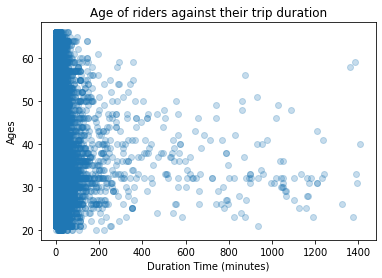

In [43]:
# plotting relation between ages and time tripping 
plt.scatter(data=df, x='duration_min' ,y='Age', alpha=5/20);
label_title("Duration Time (minutes)", "Ages", "Age of riders against their trip duration")

> Observation(2): It was observed that all ages love to trip less than 200 minutes.

### How does age affect the customers user type ? 

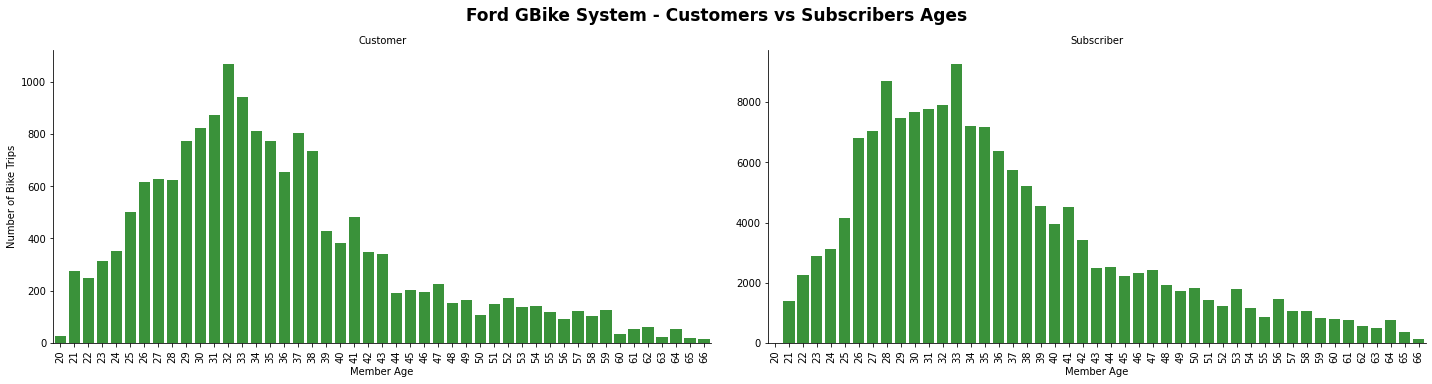

In [44]:
# Customer vs Subscriber Usage by Age
plot = sb.catplot(data = df, x = 'Age', col='user_type', kind='count', sharey = False, color = color, height=5, aspect=2)
plot.set_axis_labels('Member Age', 'Number of Bike Trips')
plot.set_titles('{col_name}')
plot.fig.suptitle('Ford GBike System - Customers vs Subscribers Ages', y=1.05, fontsize=17, fontweight='bold');
plot.set_xticklabels(rotation=90);

>Observation(3): Subscribers have a wider range of ages whilst Customers tends to have mostly younger users.

### What is the relation between Age and Gender ? 

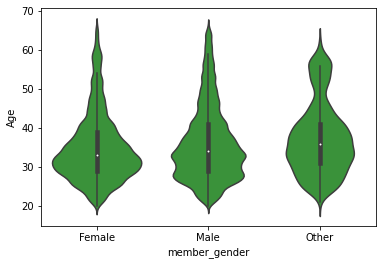

In [45]:
# plotting violin 
sb.violinplot(data=df, x='member_gender', y='Age', color=color, innner=None);

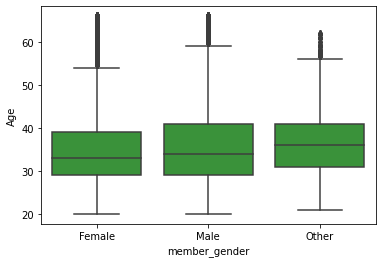

In [46]:
# plotting box plot 
sb.boxplot(data=df, x='member_gender', y='Age', color=color);

>Observation(4): Though not a huge difference, male riders tend to have shorter trips compared to female users, indicated by both a smaller median and shorter Inter Quartile Range.  


### What is the distribution of start hour depending on user type? 

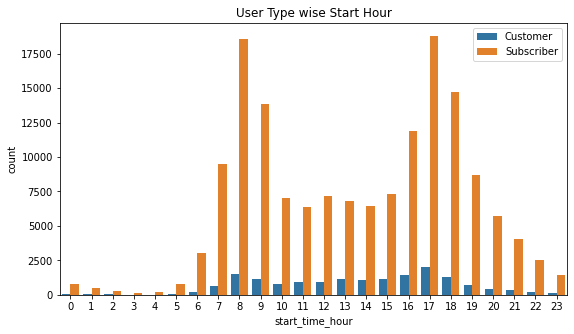

In [47]:
# clustered bar chart, absolute counts
plt.figure(figsize = [20, 5])
plt.subplot(1, 2, 1)
sb.countplot(data = df, x = 'start_time_hour', hue = 'user_type')
plt.legend();
plt.title('User Type wise Start Hour');


> Observation(5): Subscribers take trips mostly during 8-9 am and 4-6 pm which is usually working hours of a company.

### What is the relation user type and time of trip? 

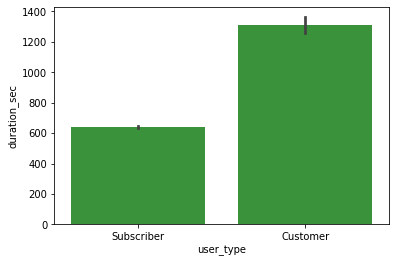

In [48]:
# making the order of user type 
o = df.user_type.value_counts().index
sb.barplot(y='duration_sec' , x='user_type' ,data=df , color=color , order=o);

> Observation(6): The customer type of users spend more time on trips compared to the subscriber type.

### Observations 

> There are a lot more subscribers patronizing the system than customers. The riding habit/pattern varies a lot between subscribers and customers. Subscribers use the bike sharing system for work commnute thus most trips were on work days (Mon-Fri) and especially during rush hours (when going to work in the morning and getting off work in the afternoon), whereas customers tend to ride for fun in the afternoon or early evenings over weekends.

### Further observations

> It is interesting to see that subscribers are slightly older than customers on average but take much shorter/quicker rides. And October had the most bike riding usage for subscribers throughout the year.

<a id='multivariate'></a>
## Multivariate Exploration

> Plots of three or more variables to investigate the Ford Go Bike data even further.

### What is the average trip duration variation in weekdays between customers and subscribers ?

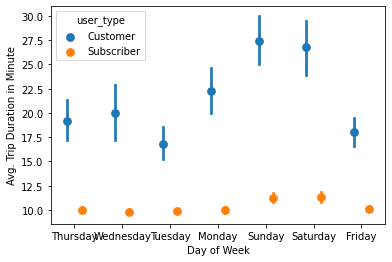

In [49]:
sb.pointplot(data=df, x='start_time_weekday', y='duration_min', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

>Observation(1): It can be seen from the above plot that subscribers ride much shorter/quicker trips compared to customers on each day of the week.

## Conclusions
### There were some features that strengthened each other in terms of looking at your feature(s) of interest.

The relationship between the various variables plotted is seen collectively and information is displayed simultaneously, strengthening some of the patterns identified in the preceding bivariate investigation as well as in the univariate research. Subscribers' efficient/short periods of consumption are consistent with their high concentration during Monday through Friday rush hours, showing that the use is mostly for commuting to work. Customers are using the bike sharing system significantly differently from subscribers, as seen by their more flexible and loose use patterns.       

### There were interesting interactions between features.
The interactions between features are all supplementing each other and quite make sense when looked at combined, there's no big surprise observed. The usage habit difference between male and female is not that much or obvious throughout the exploration, which could be related to the imbalanced number of female riders/records.

<a id='summary'></a>
## Summary

Renting a bike from the Ford Go-Bike System in San Francisco is a great way to explore the Bay Area. Subscribers and Customers use the system on weekdays at 8-9am and 5-6pm, and, occasionally around lunch time.

In [50]:
!jupyter nbconvert Part_II_Ford-Go-Bike-Data-Visualization.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_Ford-Go-Bike-Data-Visualization.ipynb to slides
[NbConvertApp] Writing 994617 bytes to Part_II_Ford-Go-Bike-Data-Visualization.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "c:\users\srede\miniconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\users\srede\miniconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\srede\miniconda3\Scripts\jupyter-nbconvert.EXE\__main__.py", line 7, in <module>
  File "C:\Users\srede\AppData\Roaming\Python\Python39\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\srede\AppData\Roaming\Python\Python39\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File